Juan Miguel Armenta Cano  
ICD

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("male_teams.csv")
print(df.head())

   fifa_update  league_id     league_name  league_level  nationality_id  \
0            2         13  Premier League           1.0              14   
1            2         13  Premier League           1.0              14   
2            2         14    Championship           2.0              14   
3            2         14      League One           2.0              14   
4            2         13  Premier League           1.0              14   

  nationality_name  overall  attack  defence  rival_team  \
0          England       81      82       78          18   
1          England       74      76       73          88   
2          England       68      69       65        1796   
3          England       68      67       67           3   
4          England       82      83       81           1   

   international_prestige  domestic_prestige  starting_xi_average_age  \
0                      18               18.0                    25.09   
1                      15               15

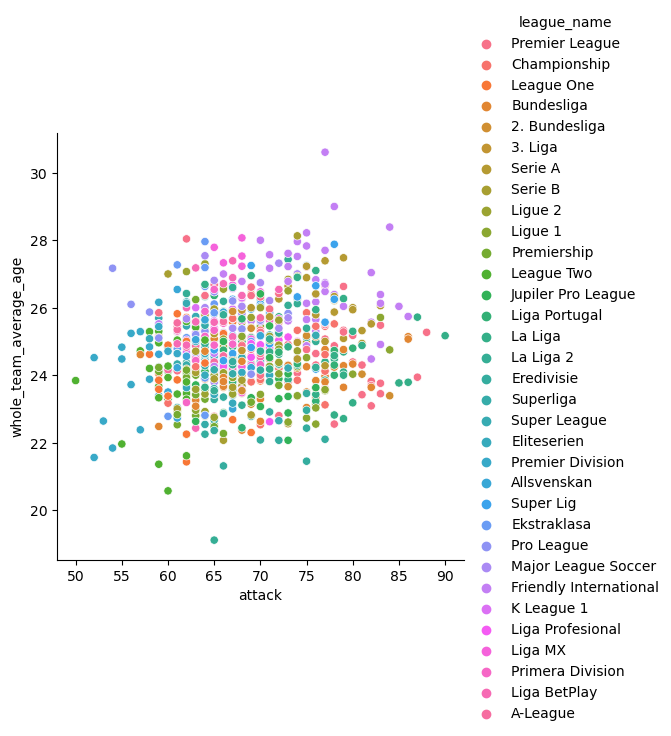

In [3]:
sns.relplot(data=df, x="attack", y="whole_team_average_age",hue="league_name")

<Axes: >

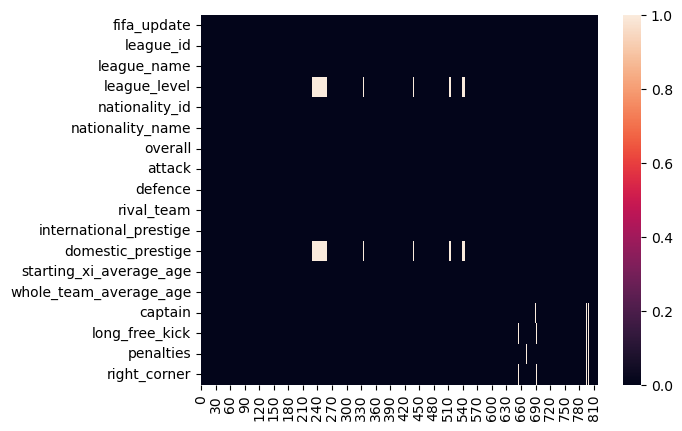

In [4]:
sns.heatmap(df.isna().transpose())

In [5]:
#Limpieza de datos
df = df.fillna(0)
# Observamos que con df.fillna(0) desaparecen todos los datos nulos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fifa_update              819 non-null    int64  
 1   league_id                819 non-null    int64  
 2   league_name              819 non-null    object 
 3   league_level             819 non-null    float64
 4   nationality_id           819 non-null    int64  
 5   nationality_name         819 non-null    object 
 6   overall                  819 non-null    int64  
 7   attack                   819 non-null    int64  
 8   defence                  819 non-null    int64  
 9   rival_team               819 non-null    int64  
 10  international_prestige   819 non-null    int64  
 11  domestic_prestige        819 non-null    float64
 12  starting_xi_average_age  819 non-null    float64
 13  whole_team_average_age   819 non-null    float64
 14  captain                  8

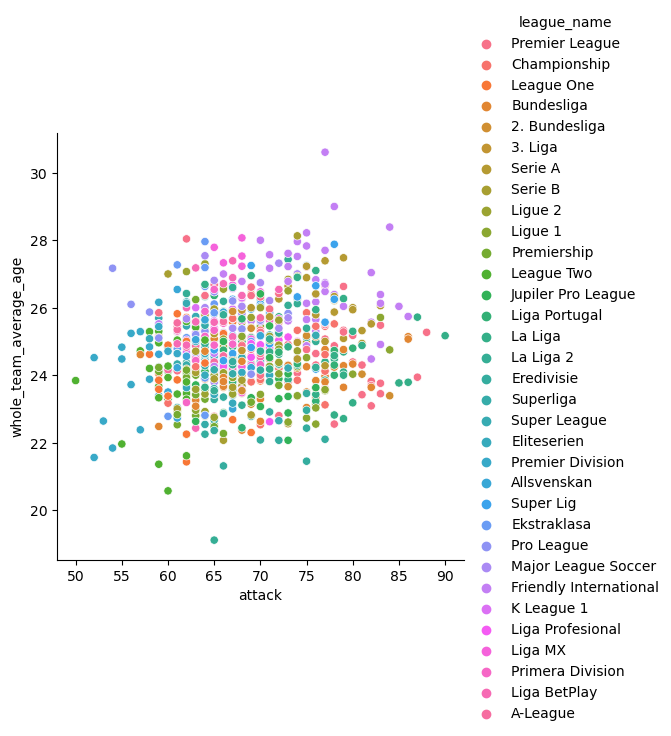

In [6]:
#Visualización de datos
sns.relplot(data=df, x="attack", y="whole_team_average_age",hue="league_name")
#en la grafica que proyectamos a continuacion no hubo cambio alguno apesar de haber eliminado los valores non

In [7]:
#Limpieza de datos
df=df.drop(['league_name','nationality_name'],axis=1)

In [8]:
df

,fifa_update,league_id,league_level,nationality_id,overall,attack,defence,rival_team,international_prestige,domestic_prestige,starting_xi_average_age,whole_team_average_age,captain,long_free_kick,penalties,right_corner
0,2,13,1.0,14,81,82,78,18,18,18.0,25.09,23.82,53612.0,176635.0,176635.0,176635.0
1,2,13,1.0,14,74,76,73,88,15,15.0,26.00,24.64,164469.0,189280.0,164469.0,189280.0
2,2,14,2.0,14,68,69,65,1796,13,12.0,26.00,24.57,198904.0,139609.0,184624.0,139609.0
3,2,14,2.0,14,68,67,67,3,12,13.0,27.09,25.57,183527.0,183527.0,165185.0,183527.0
4,2,13,1.0,14,82,83,81,1,20,20.0,25.64,23.76,13732.0,162895.0,183277.0,162895.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,2,4,1.0,7,69,70,69,231,7,8.0,26.73,26.41,175896.0,163429.0,194171.0,163429.0
815,2,39,1.0,95,69,72,66,693,7,16.0,27.45,25.39,164839.0,167669.0,167669.0,167669.0
816,2,39,1.0,95,68,70,68,689,6,16.0,27.91,26.74,165169.0,164571.0,155827.0,212709.0
817,2,39,1.0,95,68,73,66,112828,9,17.0,27.00,25.70,176071.0,176062.0,176062.0,176062.0


In [9]:
X= df.iloc[:, 0:-1]
y= df.iloc[:, -1]

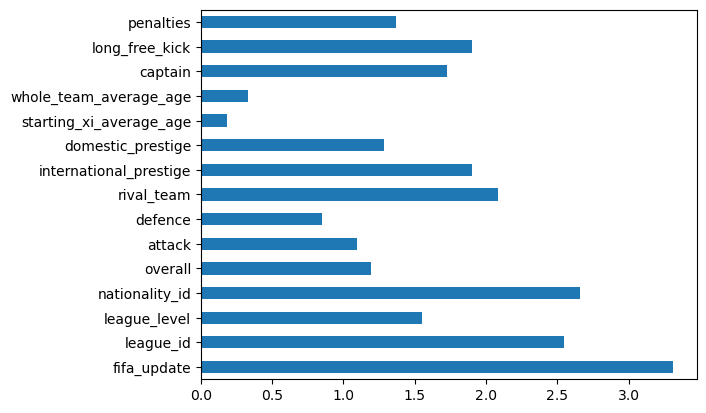

In [10]:
#Seleccion de atributos
# Dada la seleccion de attibitos las de mayor interes son los que manejan mayor longitud ya que se presentan un peso mas grande.

X1 = mutual_info_classif(X,y)
ft_imp = pd.Series (X1,df.columns [0:len(df.columns)-1])
ft_imp.plot (kind='barh')
plt.show()

In [12]:
#REduccion de dimensionalidad
#En la grafica que vemos a continuacio se muestra la dimensionalidad de datos de interes ya que los datos no esta dispersos 
from sklearn.decomposition import PCA

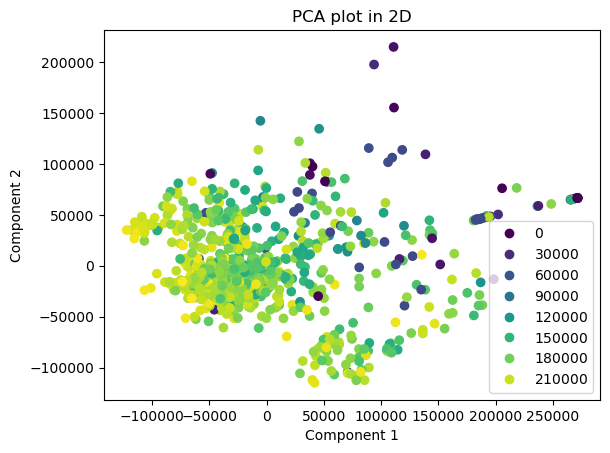

In [13]:
X_PCA = PCA(n_components=2).fit_transform(X)
scatter = plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y)      
plt.title('PCA plot in 2D') 
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()
                                          